In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Import Data

In [48]:
df = pd.read_csv('nndb_flat.csv')
pd.set_option('display.max_columns', None)
print(df.shape)
df.head()

(8618, 45)


,ID,FoodGroup,ShortDescrip,Descrip,CommonName,MfgName,ScientificName,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,1001,Dairy and Egg Products,"BUTTER,WITH SALT","Butter, salted",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,1002,Dairy and Egg Products,"BUTTER,WHIPPED,WITH SALT","Butter, whipped, with salt",NaN,NaN,NaN,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,1003,Dairy and Egg Products,"BUTTER OIL,ANHYDROUS","Butter oil, anhydrous",NaN,NaN,NaN,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,1004,Dairy and Egg Products,"CHEESE,BLUE","Cheese, blue",NaN,NaN,NaN,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,1005,Dairy and Egg Products,"CHEESE,BRICK","Cheese, brick",NaN,NaN,NaN,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [49]:
df.columns

Index(['ID', 'FoodGroup', 'ShortDescrip', 'Descrip', 'CommonName', 'MfgName',
       'ScientificName', 'Energy_kcal', 'Protein_g', 'Fat_g', 'Carb_g',
       'Sugar_g', 'Fiber_g', 'VitA_mcg', 'VitB6_mg', 'VitB12_mcg', 'VitC_mg',
       'VitE_mg', 'Folate_mcg', 'Niacin_mg', 'Riboflavin_mg', 'Thiamin_mg',
       'Calcium_mg', 'Copper_mcg', 'Iron_mg', 'Magnesium_mg', 'Manganese_mg',
       'Phosphorus_mg', 'Selenium_mcg', 'Zinc_mg', 'VitA_USRDA', 'VitB6_USRDA',
       'VitB12_USRDA', 'VitC_USRDA', 'VitE_USRDA', 'Folate_USRDA',
       'Niacin_USRDA', 'Riboflavin_USRDA', 'Thiamin_USRDA', 'Calcium_USRDA',
       'Copper_USRDA', 'Magnesium_USRDA', 'Phosphorus_USRDA', 'Selenium_USRDA',
       'Zinc_USRDA'],
      dtype='object')

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8618 entries, 0 to 8617
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                8618 non-null   int64  
 1   FoodGroup         8618 non-null   object 
 2   ShortDescrip      8618 non-null   object 
 3   Descrip           8618 non-null   object 
 4   CommonName        1063 non-null   object 
 5   MfgName           1560 non-null   object 
 6   ScientificName    732 non-null    object 
 7   Energy_kcal       8618 non-null   float64
 8   Protein_g         8618 non-null   float64
 9   Fat_g             8618 non-null   float64
 10  Carb_g            8618 non-null   float64
 11  Sugar_g           8618 non-null   float64
 12  Fiber_g           8618 non-null   float64
 13  VitA_mcg          8618 non-null   float64
 14  VitB6_mg          8618 non-null   float64
 15  VitB12_mcg        8618 non-null   float64
 16  VitC_mg           8618 non-null   float64


In [51]:
df['FoodGroup'].value_counts()

Beef Products                          946
Vegetables and Vegetable Products      828
Baked Products                         797
Soups, Sauces, and Gravies             452
Lamb, Veal, and Game Products          438
Poultry Products                       390
Legumes and Legume Products            389
Fast Foods                             371
Breakfast Cereals                      363
Baby Foods                             362
Sweets                                 347
Fruits and Fruit Juices                346
Pork Products                          343
Beverages                              315
Finfish and Shellfish Products         267
Dairy and Egg Products                 264
Sausages and Luncheon Meats            244
Fats and Oils                          219
Cereal Grains and Pasta                183
Snacks                                 171
American Indian/Alaska Native Foods    165
Nut and Seed Products                  133
Meals, Entrees, and Side Dishes        113
Restaurant 

It seems that there is some bias in this dataset because the classes are imbalanced.

### Preprocessing

In [52]:
df.isna().sum()

ID                     0
FoodGroup              0
ShortDescrip           0
Descrip                0
CommonName          7555
MfgName             7058
ScientificName      7886
Energy_kcal            0
Protein_g              0
Fat_g                  0
Carb_g                 0
Sugar_g                0
Fiber_g                0
VitA_mcg               0
VitB6_mg               0
VitB12_mcg             0
VitC_mg                0
VitE_mg                0
Folate_mcg             0
Niacin_mg              0
Riboflavin_mg          0
Thiamin_mg             0
Calcium_mg             0
Copper_mcg             0
Iron_mg                0
Magnesium_mg           0
Manganese_mg           0
Phosphorus_mg          0
Selenium_mcg           0
Zinc_mg                0
VitA_USRDA             0
VitB6_USRDA            0
VitB12_USRDA           0
VitC_USRDA             0
VitE_USRDA             0
Folate_USRDA           0
Niacin_USRDA           0
Riboflavin_USRDA       0
Thiamin_USRDA          0
Calcium_USRDA          0


In [53]:
df.CommonName.unique()

array([nan, 'Cassia', 'Chinese parsley, cilantro', 'mint',
       'low erucic acid rapeseed oil', 'lite mayonnaise', 'NuSun',
       'trans free high stability low saturated fat non-hydrogenated canola oil',
       'Canadian geese',
       'USDA Commodity A532 (12.5 oz can) and A507(50 oz can)',
       'Ruffed grouse', 'NFSMI Recipe No. G-08', 'NFSMI Recipe No. G-05',
       'hot dog, frank, wiener', 'hot dog, wiener, frank',
       'hot dog, frank, frankfurter, hotdog',
       'hot dog, frankfurter, hotdog, wiener',
       'hot dog, frankfurter, frank', 'hot dog, wiener, frankfurter',
       'Includes USDA Commodity B879', 'includes USDA Commodity B856',
       'Includes USDA Commodity B876', 'includes USDA Commodity B857',
       'Includes USDA Commodity B853', 'original',
       'oatmeal, old-fashioned oats, rolled oats', 'oatmeal, cooked',
       'instant oatmeal, Quaker original flavor', 'instant oatmeal',
       'oatmeal', 'QUAKER Oat Bran Cereal',
       'Includes USDA Commodity

In [54]:
df.MfgName.unique()

array([nan, 'Campbell Soup Co.', 'Mead Johnson', 'Kraft Foods, Inc.',
       'GFA Brands', 'Dow AgroSciences, LLC', 'ConAgra, Inc.',
       'ADM KAO LLC', 'McNeil Nutritionals, LLC', 'Smart Balance Foods',
       'Smart Soup', 'H.J. Heinz, Co.', 'Hormel Foods Corp.',
       'Kellogg, Co.', 'Post Foods, LLC', 'The Quaker Oats, Co.',
       'General Mills Inc.', 'Ralston Foods', 'MOM Brands',
       'Sun Country Foods Inc.', 'B&G Foods, Inc', 'Homestat Farm Ltd.',
       'Hain Celestial Group, Inc.', 'Attune Foods, Inc.',
       "Nature's Path", "Barbara's Bakery, Inc",
       'Naked Juice Co. of Glendora, Inc.', 'Dole Food Company',
       'Odwalla', 'Wm. Bolthouse Farms, Inc.', 'Anheuser-Busch, Inc.',
       'Monster energy company', 'The Coca-Cola Company',
       "Abbott's Ross Products Division", 'CytoSport',
       'Ocean Spray Cranberries, INc.', 'Nestle USA, Inc.', 'Unilever',
       'Lipton', 'Salada', 'Zevia', 'Icelandic Glacial Inc.',
       'Pepsi-Cola North America', 'Red Bu

In [55]:
df.ScientificName.unique()

array([nan, 'Pimenta dioica', 'Pimpinella anisum', 'Ocimum basilicum',
       'Laurus nobilis', 'Carum carvi', 'Elettaria cardamomum',
       'Apium graveolens', 'Anthriscus cerefolium',
       'Cinnamomum aromaticum', 'Syzygium aromaticum',
       'Coriandrum sativum', 'Cuminum cyminum', 'Anethum graveolens',
       'Foeniculum vulgare', 'Trigonella foenum-graecum',
       'Allium sativum', 'Zingiber officinale', 'Myristica fragrans',
       'Origanum majorana', 'Sinapis alba and Brassica juncea',
       'Allium cepa', 'Origanum vulgare', 'Capsicum annuum',
       'Petroselinum crispum', 'Piper nigrum',
       'Capsicum frutescens or Capsicum annuum', 'Papaver somniferum',
       'Rosmarinus officinalis', 'Crocus sativus', 'Salvia officinalis',
       'Satureja hortensis', 'Artemisia dracunculus', 'Thymus vulgaris',
       'Curcuma longa L.', 'Capparis spinosa',
       'Mentha x piperita L. nothosubsp. piperita', 'Mentha spicata',
       'Gallus gallus', 'Branta canadensis', 'Anas pla

Given that these three columns are mostly NULL values and also since they are non-numeric, they should be dropped.

Also, the columns "ID", "ShortDescrip", and "Descrip" will be dropped.

In [56]:
df.drop(columns=['ID', 'CommonName', 'MfgName', 
                 'ScientificName', 'ShortDescrip', 'Descrip'], axis=1, inplace=True)
df.head()

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,Dairy and Egg Products,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,Dairy and Egg Products,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,Dairy and Egg Products,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,Dairy and Egg Products,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


### Label encode and split data into training and testing sets

In [57]:
encoder = LabelEncoder()
encoder.fit(df['FoodGroup'])
df['FoodGroup'] = encoder.transform(df['FoodGroup'])
classes = dict(zip(encoder.transform(encoder.classes_), encoder.classes_))
print(classes)

{0: 'American Indian/Alaska Native Foods', 1: 'Baby Foods', 2: 'Baked Products', 3: 'Beef Products', 4: 'Beverages', 5: 'Breakfast Cereals', 6: 'Cereal Grains and Pasta', 7: 'Dairy and Egg Products', 8: 'Fast Foods', 9: 'Fats and Oils', 10: 'Finfish and Shellfish Products', 11: 'Fruits and Fruit Juices', 12: 'Lamb, Veal, and Game Products', 13: 'Legumes and Legume Products', 14: 'Meals, Entrees, and Side Dishes', 15: 'Nut and Seed Products', 16: 'Pork Products', 17: 'Poultry Products', 18: 'Restaurant Foods', 19: 'Sausages and Luncheon Meats', 20: 'Snacks', 21: 'Soups, Sauces, and Gravies', 22: 'Spices and Herbs', 23: 'Sweets', 24: 'Vegetables and Vegetable Products'}


In [58]:
df.head()

,FoodGroup,Energy_kcal,Protein_g,Fat_g,Carb_g,Sugar_g,Fiber_g,VitA_mcg,VitB6_mg,VitB12_mcg,VitC_mg,VitE_mg,Folate_mcg,Niacin_mg,Riboflavin_mg,Thiamin_mg,Calcium_mg,Copper_mcg,Iron_mg,Magnesium_mg,Manganese_mg,Phosphorus_mg,Selenium_mcg,Zinc_mg,VitA_USRDA,VitB6_USRDA,VitB12_USRDA,VitC_USRDA,VitE_USRDA,Folate_USRDA,Niacin_USRDA,Riboflavin_USRDA,Thiamin_USRDA,Calcium_USRDA,Copper_USRDA,Magnesium_USRDA,Phosphorus_USRDA,Selenium_USRDA,Zinc_USRDA
0,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.17,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.000,0.02,2.0,0.000,24.0,1.0,0.09,0.760000,0.001765,0.070833,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000000,0.004762,0.034286,0.018182,0.008182
1,7,717.0,0.85,81.11,0.06,0.06,0.0,684.0,0.003,0.13,0.0,2.32,3.0,0.042,0.034,0.005,24.0,0.016,0.16,2.0,0.004,23.0,1.0,0.05,0.760000,0.001765,0.054167,0.0,0.154667,0.0075,0.002625,0.026154,0.004167,0.020000,0.000018,0.004762,0.032857,0.018182,0.004545
2,7,876.0,0.28,99.48,0.00,0.00,0.0,840.0,0.001,0.01,0.0,2.80,0.0,0.003,0.005,0.001,4.0,0.001,0.00,0.0,0.000,3.0,0.0,0.01,0.933333,0.000588,0.004167,0.0,0.186667,0.0000,0.000188,0.003846,0.000833,0.003333,0.000001,0.000000,0.004286,0.000000,0.000909
3,7,353.0,21.40,28.74,2.34,0.50,0.0,198.0,0.166,1.22,0.0,0.25,36.0,1.016,0.382,0.029,528.0,0.040,0.31,23.0,0.009,387.0,14.5,2.66,0.220000,0.097647,0.508333,0.0,0.016667,0.0900,0.063500,0.293846,0.024167,0.440000,0.000044,0.054762,0.552857,0.263636,0.241818
4,7,371.0,23.24,29.68,2.79,0.51,0.0,292.0,0.065,1.26,0.0,0.26,20.0,0.118,0.351,0.014,674.0,0.024,0.43,24.0,0.012,451.0,14.5,2.60,0.324444,0.038235,0.525000,0.0,0.017333,0.0500,0.007375,0.270000,0.011667,0.561667,0.000027,0.057143,0.644286,0.263636,0.236364


In [59]:
x = df.iloc[:, 1:]
y = df.iloc[:, 0]
print(x.shape)

(8618, 38)


In [60]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

### Baseline model: Logistic Regression

In [61]:
# standardize features for logistic regression by using standard scaler
def scaler(x_train, y_train):
    scaler = StandardScaler() 
    scaled_x_train = scaler.fit_transform(x_train)
    scaled_x_test = scaler.fit_transform(x_test)
    return scaled_x_train, scaled_x_test
scaled_x_train, scaled_x_test = scaler(x_train, x_test)

In [62]:
lr = LogisticRegression(max_iter=300)
lr.fit(scaled_x_train, y_train)
y_pred = lr.predict(scaled_x_test)
print('accuracy of logistic regression:', accuracy_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

accuracy of logistic regression: 0.6415313225058005

                                     precision    recall  f1-score   support

American Indian/Alaska Native Foods       0.11      0.03      0.04        36
                         Baby Foods       0.52      0.47      0.49        86
                     Baked Products       0.76      0.82      0.79       175
                      Beef Products       0.77      0.94      0.85       191
                          Beverages       0.38      0.10      0.16        80
                  Breakfast Cereals       0.85      0.81      0.83        64
            Cereal Grains and Pasta       0.54      0.62      0.58        34
             Dairy and Egg Products       0.62      0.81      0.71        43
                         Fast Foods       0.71      0.62      0.66        71
                      Fats and Oils       0.81      0.78      0.80        45
     Finfish and Shellfish Products       0.71      0.68      0.69        50
            Fruits and

Logistic regression accuracy is decent. I think due to the bias in the dataset, this model did not score as high. Let's see how a random forest does compared to logistic regression.

### Random Forest

In [63]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print('accuracy of random forest:', accuracy_score(y_test, y_pred))
print('')
print(classification_report(y_test, y_pred, target_names=encoder.classes_))

accuracy of random forest: 0.867169373549884

                                     precision    recall  f1-score   support

American Indian/Alaska Native Foods       0.95      0.50      0.65        36
                         Baby Foods       0.89      0.78      0.83        86
                     Baked Products       0.88      0.92      0.90       175
                      Beef Products       0.96      0.93      0.94       191
                          Beverages       0.84      0.78      0.81        80
                  Breakfast Cereals       0.87      0.91      0.89        64
            Cereal Grains and Pasta       0.83      0.85      0.84        34
             Dairy and Egg Products       0.85      0.79      0.82        43
                         Fast Foods       0.89      0.87      0.88        71
                      Fats and Oils       0.88      0.78      0.82        45
     Finfish and Shellfish Products       0.93      1.00      0.96        50
            Fruits and Fruit 

In [64]:
# test consistency of the model using 10-fold cross validation
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='accuracy')

print('scores:', np.array(scores))
print('mean accuracy:', scores.mean())
print('standard deviation:', scores.std())

scores: [0.8826087  0.86521739 0.87826087 0.87101449 0.88824383 0.89114659
 0.90130624 0.86211901 0.90566038 0.87373004]
mean accuracy: 0.8819307545066364
standard deviation: 0.013912141198035601


Based off these results, the model has an average accuracy of 88% and a standard deviation of 0.0139. I think a standard deviation of 0.0139 means the model is very consistent and that the estimates are precise.

In [65]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [66]:
# grid search to optimize the parameters
param_grid = {
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [4, 6, 8, 10],
    'n_estimators': [100, 150, 200, 250]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=3)
grid_search.fit(x_train, y_train)
print(grid_search.best_params_)
print(grid_search.best_estimator_)

{'criterion': 'entropy', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 200}
RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=4, n_estimators=200)


In [67]:
# select the best model from the grid search
rf = grid_search.best_estimator_
scores = cross_val_score(rf, x_train, y_train, cv=10, scoring='accuracy')

print('scores:', np.array(scores))
print('mean accuracy:', scores.mean())
print('standard deviation:', scores.std())

scores: [0.87536232 0.85797101 0.87101449 0.87971014 0.87082729 0.87518142
 0.8969521  0.86647315 0.89550073 0.88098694]
mean accuracy: 0.8769979596558761
standard deviation: 0.011473615958457558


Tuning the parameters did not increase the mean accuracy of the random forest. I believe this is due to there being not enough data. I think in order to see a positive increase in accuracy for the random forest, more data would need to be added.

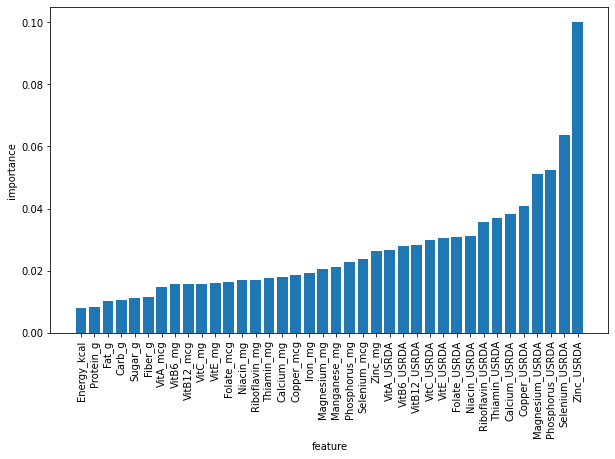

In [68]:
importances = np.sort(np.array(rf.feature_importances_))
plt.figure(figsize=(10,6))
plt.bar(x_train.columns, importances)
plt.xlabel('feature')
plt.ylabel('importance')
plt.xticks(rotation=90)
plt.show()